## 导入模块

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.tools as pltools

In [185]:
data = pd.read_csv(r"C:\Users\fanhang\Desktop\learn_python\NP\RFM\data.csv", encoding= 'unicode_escape', dtype=({"CustomerID":str}))
data.drop(["Description"], axis=1, inplace=True)
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [186]:
data.apply(lambda x: sum(x.isnull())/len(x), axis = 0)
# sum(data.iloc[:, 1].isnull())

InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [187]:
data["CustomerID"] = data["CustomerID"].fillna("U")

In [188]:
data[data["CustomerID"]=="U"].head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,56,12/1/2010 11:52,0.00,U,United Kingdom
1443,536544,21773,1,12/1/2010 14:32,2.51,U,United Kingdom
1444,536544,21774,2,12/1/2010 14:32,2.51,U,United Kingdom
1445,536544,21786,4,12/1/2010 14:32,0.85,U,United Kingdom
1446,536544,21787,2,12/1/2010 14:32,1.66,U,United Kingdom


In [189]:
data["Amount"]=data["Quantity"] * data["UnitPrice"]

In [190]:
data["Date"] = [i.split(" ")[0] for i in data["InvoiceDate"]]
data["Time"] = [i.split(" ")[1] for i in data["InvoiceDate"]]

In [191]:
# data.drop(["InvoiceDate"], axis = 1, inplace= True)

In [192]:
# data.rename(columns={"Data":"Date"}, inplace=True)

In [193]:
data["Year"] = [i.split("/")[2] for i in data["Date"]]
data["Month"] = [i.split("/")[0] for i in data["Date"]]
data["Day"] = [i.split("/")[1] for i in data["Date"]]
# data.drop(["Date"], axis=1, inplace=True)
data["Date"] = pd.to_datetime(data["Date"])

In [194]:
data = data.drop_duplicates()

In [195]:
data.describe()

,Quantity,UnitPrice,Amount
count,536639.000000,536639.000000,536639.000000
mean,9.619500,4.632660,18.122900
std,219.130206,97.233299,380.656313
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.870000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


In [196]:
# 退货订单

# sum(data["Quantity"] < 0) == sum(data["Quantity"] <= 0)
df1 = data[data["Quantity"] < 0]
len(df1) / len(data) # 退货率
df1

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Time,Year,Month,Day
141,C536379,D,-1,12/1/2010 9:41,27.50,14527,United Kingdom,-27.50,2010-12-01,9:41,2010,12,1
154,C536383,35004C,-1,12/1/2010 9:49,4.65,15311,United Kingdom,-4.65,2010-12-01,9:49,2010,12,1
235,C536391,22556,-12,12/1/2010 10:24,1.65,17548,United Kingdom,-19.80,2010-12-01,10:24,2010,12,1
236,C536391,21984,-24,12/1/2010 10:24,0.29,17548,United Kingdom,-6.96,2010-12-01,10:24,2010,12,1
237,C536391,21983,-24,12/1/2010 10:24,0.29,17548,United Kingdom,-6.96,2010-12-01,10:24,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,-11,12/9/2011 9:57,0.83,14397,United Kingdom,-9.13,2011-12-09,9:57,2011,12,9
541541,C581499,M,-1,12/9/2011 10:28,224.69,15498,United Kingdom,-224.69,2011-12-09,10:28,2011,12,9
541715,C581568,21258,-5,12/9/2011 11:57,10.95,15311,United Kingdom,-54.75,2011-12-09,11:57,2011,12,9
541716,C581569,84978,-1,12/9/2011 11:58,1.25,17315,United Kingdom,-1.25,2011-12-09,11:58,2011,12,9


In [202]:
# 退货金额透视图

tt = pd.pivot_table(df1, index="Year", columns="Month", values="Amount", aggfunc="sum")
tt

Month,1,10,11,12,2,3,4,5,6,7,8,9
Year,,,,,,,,,,,,
2010,NaN,NaN,NaN,-74729.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,-131363.05,-81895.5,-47720.98,-205089.27,-25519.15,-34201.28,-44600.65,-47202.51,-70569.78,-37919.13,-54330.8,-38838.51


In [206]:
total = data[(data["UnitPrice"]>0) & (data["Quantity"]>0)]
pp = pd.pivot_table(total, index="Year", columns="Month", values="Amount", aggfunc="sum")
pp

Month,1,10,11,12,2,3,4,5,6,7,8,9
Year,,,,,,,,,,,,
2010,NaN,NaN,NaN,821452.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,689811.61,1151263.73,1503329.78,637790.33,522545.56,716215.26,536968.491,769281.76,760547.01,718076.121,757841.38,1056435.192


In [242]:
p = abs(tt / pp)

p.loc["2011"]
x1 = go.Scatter(x=p.loc["2011"].index, y=p.loc["2011"], mode="markers", name="P")
layout = go.Layout(title="tt / pp", xaxis=dict(title="Month"), yaxis=dict(title="tt / pp"), legend=dict(x=1, y=.5, font=dict(color="black", size=18)))
fig = go.Figure(data=x1, layout=layout)
py.offline.iplot(fig, filename="tt/pp.html")

In [198]:
# 赠送或异常订单

df2 = data[data["UnitPrice"] <= 0]

In [199]:
df2.shape[0] / data.shape[0] # 异常比

0.0046809866595607106

In [200]:
df2["UnitPrice"].groupby(df2["UnitPrice"]).count()

UnitPrice
-11062.06       2
 0.00        2510
Name: UnitPrice, dtype: int64

In [201]:
df2[df2["UnitPrice"] == df2["UnitPrice"].min()]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Time,Year,Month,Day
299983,A563186,B,1,8/12/2011 14:51,-11062.06,U,United Kingdom,-11062.06,2011-08-12,14:51,2011,8,12
299984,A563187,B,1,8/12/2011 14:52,-11062.06,U,United Kingdom,-11062.06,2011-08-12,14:52,2011,8,12


In [290]:
# RMF模型进行用户分类
# R 最后一次消费时间
# F 消费频次
# M 消费金额

lastDate = total.groupby("CustomerID")["Date"].max()
lastDate

CustomerID
12346   2011-01-18
12347   2011-12-07
12348   2011-09-25
12349   2011-11-21
12350   2011-02-02
           ...    
18281   2011-06-12
18282   2011-12-02
18283   2011-12-06
18287   2011-10-28
U       2011-12-09
Name: Date, Length: 4339, dtype: datetime64[ns]

In [291]:
newestDate = total["Date"].max()

In [301]:
# 用户最后一次购买到数据最新一天的天数, 越小则最近有购买行为
# dt.days 提取日期
# R_value 越小用户价值越大

R_value = (newestDate - lastDate).dt.days 
R_value

CustomerID
12346    325
12347      2
12348     75
12349     18
12350    310
        ... 
18281    180
18282      7
18283      3
18287     42
U          0
Name: Date, Length: 4339, dtype: int64

In [371]:
U = total[total["CustomerID"]=="U"]["Amount"].mean()
U

13.27600434236606

In [379]:
# F 消费频次

F_value = total.groupby("CustomerID")["InvoiceNo"].nunique()
M_value = total.groupby("CustomerID")["Amount"].sum()

In [380]:
R_value.describe()

count    4339.000000
mean       92.038258
std       100.010502
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Date, dtype: float64

In [381]:
F_value.describe()

count    4339.000000
mean        4.600138
std        22.943499
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      1428.000000
Name: InvoiceNo, dtype: float64

In [382]:
M_value.describe()

count    4.339000e+03
mean     2.452537e+03
std      2.808589e+04
min      3.750000e+00
25%      3.065050e+02
50%      6.685800e+02
75%      1.660890e+03
max      1.754902e+06
Name: Amount, dtype: float64

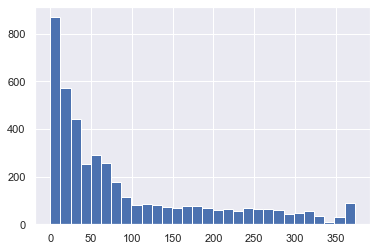

In [330]:
sns.set(style = "darkgrid")
plt.hist(R_value, bins = 30)
plt.show()

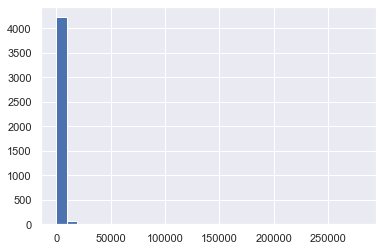

In [342]:
plt.hist(M_value, bins = 30)
plt.show()

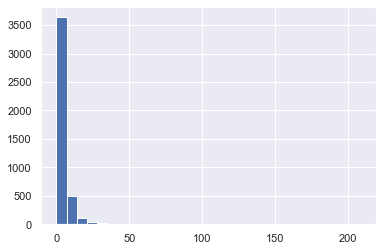

In [344]:
plt.hist(F_value, bins = 30)
plt.show()

In [389]:
# 使用cut划分等级

R_bins = [0, 5, 10, 50, 180, 400]
F_bins = [0, 2, 10, 20, 50, 1500]
M_bins = [0, 5, 100, 500, 2000, 2000000]

In [404]:
R_score = pd.cut(R_value, R_bins, labels=["5", "4", "3", "2", "1"])
F_score = pd.cut(F_value, F_bins, labels=["1", "2", "3", "4", "5"])
M_score = pd.cut(M_value, M_bins, labels=["1", "2", "3", "4", "5"])
rmf = pd.concat([R_score, F_score, M_score], axis = 1)
rmf.rename(columns={"Date":"R_score", "InvoiceNo":"F_score", "Amount":"M_score"}, inplace = True)
rmf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346 to U
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   R_score  4303 non-null   category
 1   F_score  4339 non-null   category
 2   M_score  4339 non-null   category
dtypes: category(3)
memory usage: 207.2+ KB


In [412]:
for i in ["R_score", "F_score", "M_score"]:
    rmf[i] = rmf[i].astype(float)

rmf.describe()

,R_score,F_score,M_score
count,4303.000000,4339.000000,4339.000000
mean,2.567046,1.567181,3.763310
std,1.175490,0.715560,0.817332
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000
50%,2.000000,1.000000,4.000000
75%,3.000000,2.000000,4.000000
max,5.000000,5.000000,5.000000


In [430]:
rmf["R"] = np.where(rmf["R_score"]>rmf["R_score"].mean(), "高", "低")
rmf["F"] = np.where(rmf["F_score"]>rmf["F_score"].mean(), "高", "低")
rmf["M"] = np.where(rmf["M_score"]>rmf["M_score"].mean(), "高", "低")
rmf["Value"] = rmf["R"].str[:] + rmf["F"].str[:] + rmf["M"].str[:]
rmf["Class"] = "0"

In [432]:
for i in range(0, len(rmf)):
    if rmf["Value"][i] == "高高高":
        rmf["Class"][i] = "VIP"
    elif rmf["Value"][i] == "低低低":
        rmf["Class"][i] = "Bye"
    else:
        rmf["Class"][i] = "justSoSo"

rmf

,R_score,F_score,M_score,R,F,M,Value,Class
CustomerID,,,,,,,,
12346,1.0,1.0,5.0,低,低,高,低低高,justSoSo
12347,5.0,2.0,5.0,高,高,高,高高高,VIP
12348,2.0,2.0,4.0,低,高,高,低高高,justSoSo
12349,3.0,1.0,4.0,高,低,高,高低高,justSoSo
12350,1.0,1.0,3.0,低,低,低,低低低,Bye
...,...,...,...,...,...,...,...,...
18281,2.0,1.0,2.0,低,低,低,低低低,Bye
18282,4.0,1.0,3.0,高,低,低,高低低,justSoSo
18283,5.0,3.0,5.0,高,高,高,高高高,VIP


In [442]:
def useClass(x):
    if x == "高高高":
        return "VIP"
    elif x == "低低低":
        return "Bye"
    else:
        return "justSoSo"

rmf["Class1"] = rmf["Value"].apply(useClass)
rmf

,R_score,F_score,M_score,R,F,M,Value,Class,Class1
CustomerID,,,,,,,,,
12346,1.0,1.0,5.0,低,低,高,低低高,justSoSo,justSoSo
12347,5.0,2.0,5.0,高,高,高,高高高,VIP,VIP
12348,2.0,2.0,4.0,低,高,高,低高高,justSoSo,justSoSo
12349,3.0,1.0,4.0,高,低,高,高低高,justSoSo,justSoSo
12350,1.0,1.0,3.0,低,低,低,低低低,Bye,Bye
...,...,...,...,...,...,...,...,...,...
18281,2.0,1.0,2.0,低,低,低,低低低,Bye,Bye
18282,4.0,1.0,3.0,高,低,低,高低低,justSoSo,justSoSo
18283,5.0,3.0,5.0,高,高,高,高高高,VIP,VIP


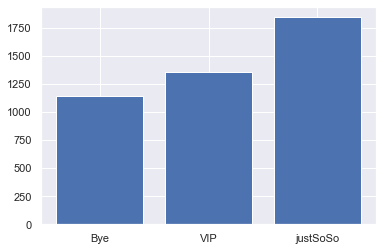

In [448]:
per = rmf["Class"].groupby(rmf["Class"]).count()

plt.bar(x = per.index, height = per.values)
plt.show()